In [114]:
# importing required librares
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB


In [86]:
df=pd.read_csv("Fertilizer_Prediction.csv")

In [87]:
df.sample(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
49,33,64,51,Sandy,Maize,5,9,29,14-35-14
24,33,64,39,Clayey,Paddy,13,0,10,20-20
18,28,54,65,Black,Cotton,39,0,0,Urea
11,31,62,48,Sandy,Maize,14,15,12,17-17-17
71,31,62,32,Red,Tobacco,39,0,0,Urea


In [88]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [89]:
df.duplicated().sum()

np.int64(0)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [91]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [92]:
df["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [93]:
le=LabelEncoder()
df['Crop Type']=le.fit_transform(df['Crop Type'])

In [94]:
le=LabelEncoder()
df['Soil Type']=le.fit_transform(df['Soil Type'])

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     int64 
 4   Crop Type        99 non-null     int64 
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(8), object(1)
memory usage: 7.1+ KB


In [96]:
df.corr(numeric_only=True)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,0.036595,0.135211,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,0.061744,0.130019,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.053386,-0.155281,-0.095945,0.027727,0.009276
Soil Type,0.036595,0.061744,-0.053386,1.000000,-0.311288,-0.159595,0.065460,0.205794
Crop Type,0.135211,0.130019,-0.155281,-0.311288,1.000000,0.071803,0.025838,-0.187574
Nitrogen,-0.033771,-0.060646,-0.095945,-0.159595,0.071803,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,0.065460,0.025838,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,0.205794,-0.187574,-0.686971,0.089192,1.000000


<Axes: >

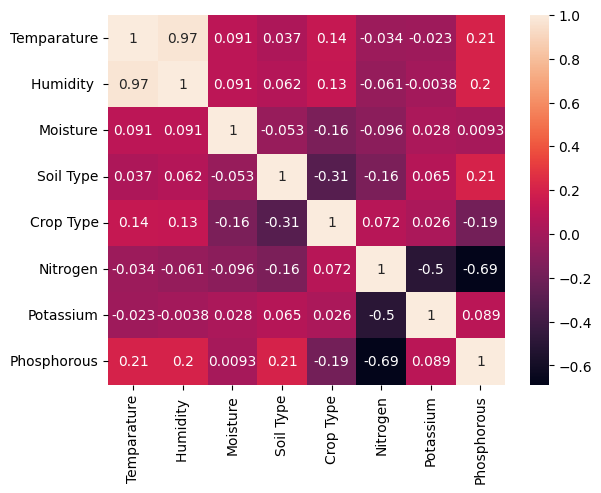

In [97]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [100]:
df = df.drop(df.columns[1], axis=1) 
x = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

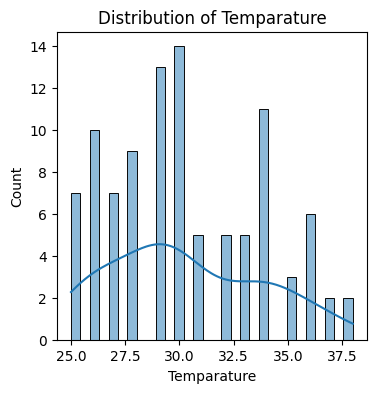

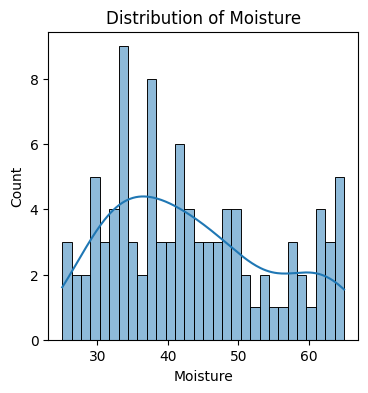

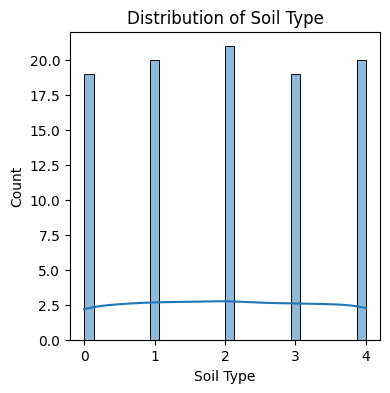

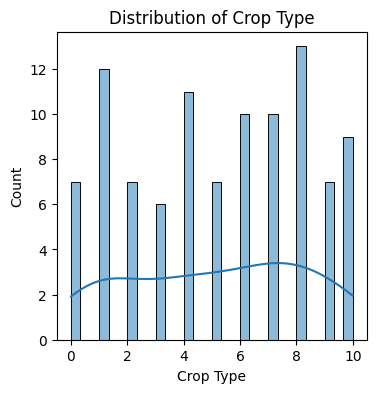

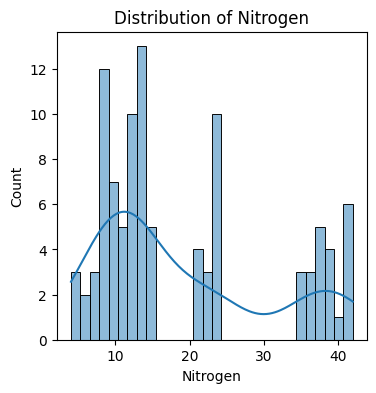

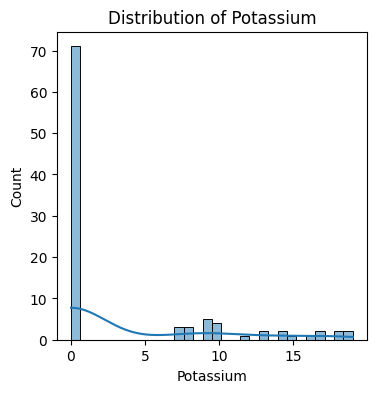

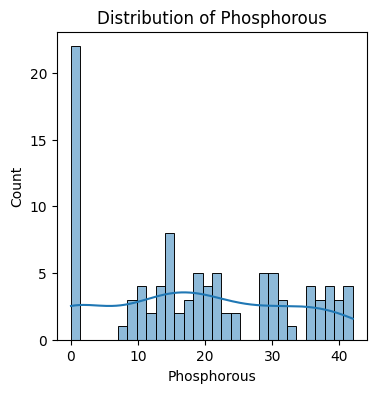

In [101]:
for col in x.columns:
    plt.figure(figsize=(4,4))
    sns.histplot(x[col],kde=True,bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [102]:
x

,Temparature,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,38,4,3,37,0,0
1,29,45,2,8,12,0,36
2,34,62,0,1,7,9,30
3,32,34,3,9,22,0,20
4,28,46,1,6,35,0,0
...,...,...,...,...,...,...,...
94,25,32,1,7,24,0,19
95,30,27,3,9,4,17,17
96,38,51,2,10,39,0,0
97,36,43,4,4,15,0,41


In [105]:
le=LabelEncoder()
y=le.fit_transform(y)

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [111]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [112]:
# traning my model
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [113]:
y_pred=gnb.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [110]:
r2_score(y_test,y_pred)

1.0

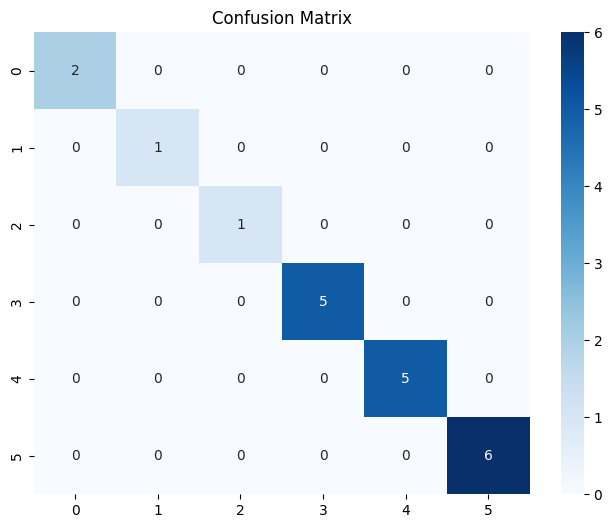

In [115]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()